In [ ]:
!git clone https://github.com/dorarad/gansformer.git
%cd gansformer
%cd pytorch_version
!pip install -r requirements.txt

Cloning into 'gansformer'...
remote: Enumerating objects: 1305, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 1305 (delta 7), reused 10 (delta 5), pack-reused 1286
Receiving objects: 100% (1305/1305), 740.41 KiB | 12.34 MiB/s, done.
Resolving deltas: 100% (818/818), done.
/content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer
/content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version


In [ ]:
import os
import numpy as np
import PIL.Image
from tqdm import trange
import argparse
from typing import List
from re import search

import dnnlib
import torch
import loader

from training import misc
from training.misc import crop_max_rectangle as crop
import matplotlib.pyplot as plt

Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1lrB4t3hOOpn8YiwHEduIZYzndHrsKX8z
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/bedrooms-snapshot.pkl
100%|██████████| 367M/367M [00:04<00:00, 79.3MB/s]


Generate and save images...


100%|██████████| 16/16 [00:40<00:00,  2.50s/it]


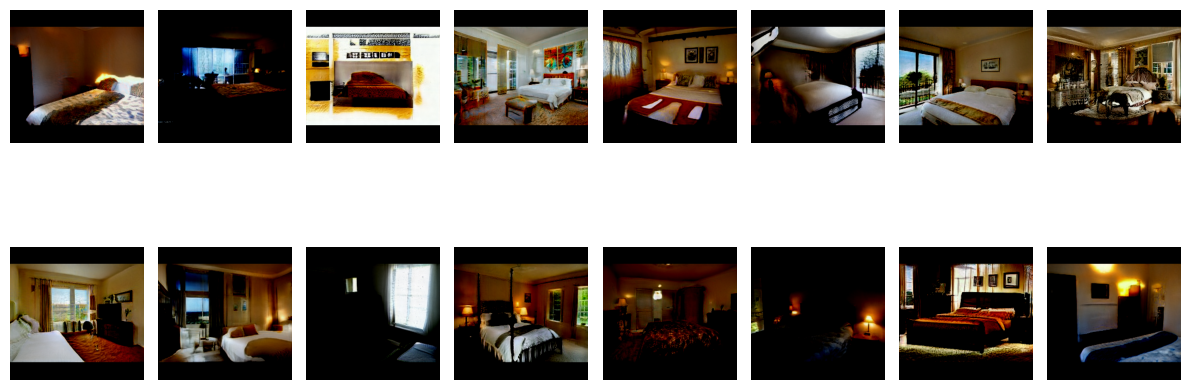




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1-b0vwevUQs6LI_EybdO8XJ5uYSx63vEa
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/ffhq-snapshot.pkl
100%|██████████| 367M/367M [00:01<00:00, 229MB/s]


Generate and save images...


100%|██████████| 16/16 [00:36<00:00,  2.29s/it]


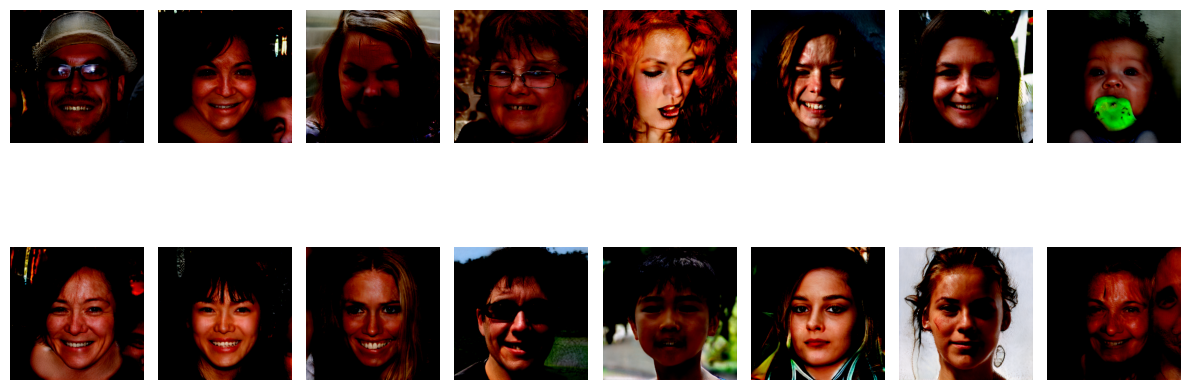




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1iL8S26IYCNAQmUS-6GYCVheKFtCE4ktQ
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/cityscapes-snapshot.pkl
100%|██████████| 367M/367M [00:01<00:00, 227MB/s]


Generate and save images...


100%|██████████| 16/16 [00:38<00:00,  2.42s/it]


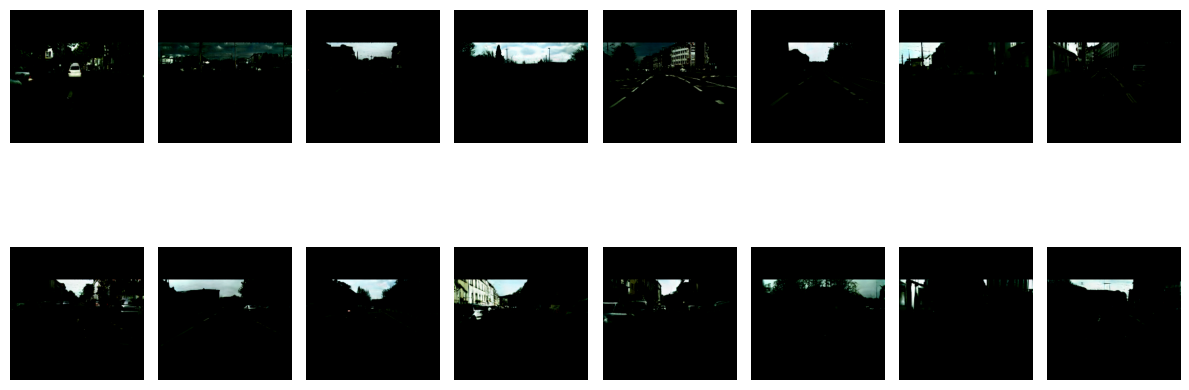




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1sYtuNEi0HGBH1F8GW2JlF4mCRGGrtZa9
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/clevr-snapshot.pkl
100%|██████████| 362M/362M [00:01<00:00, 244MB/s]


Generate and save images...


100%|██████████| 16/16 [00:34<00:00,  2.13s/it]


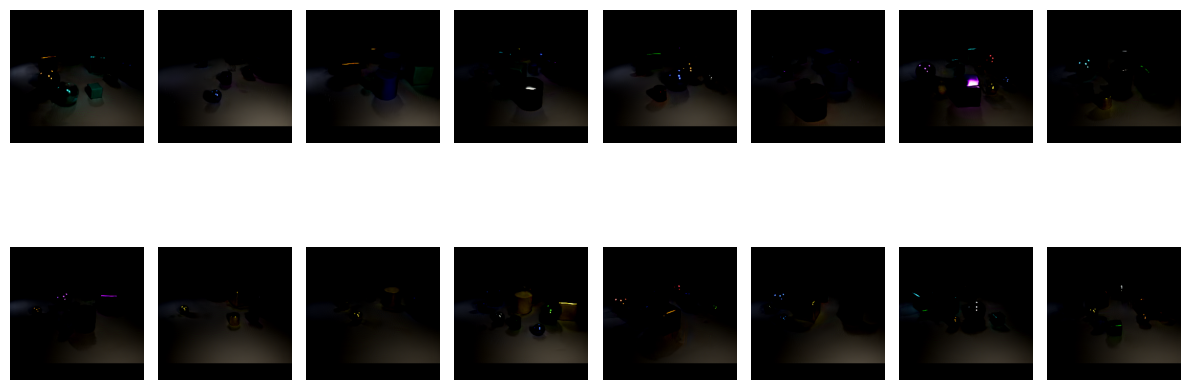




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1lrB4t3hOOpn8YiwHEduIZYzndHrsKX8z
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/bedrooms-snapshot.pkl
100%|██████████| 367M/367M [00:01<00:00, 202MB/s]


Generate and save images...


100%|██████████| 16/16 [00:37<00:00,  2.37s/it]


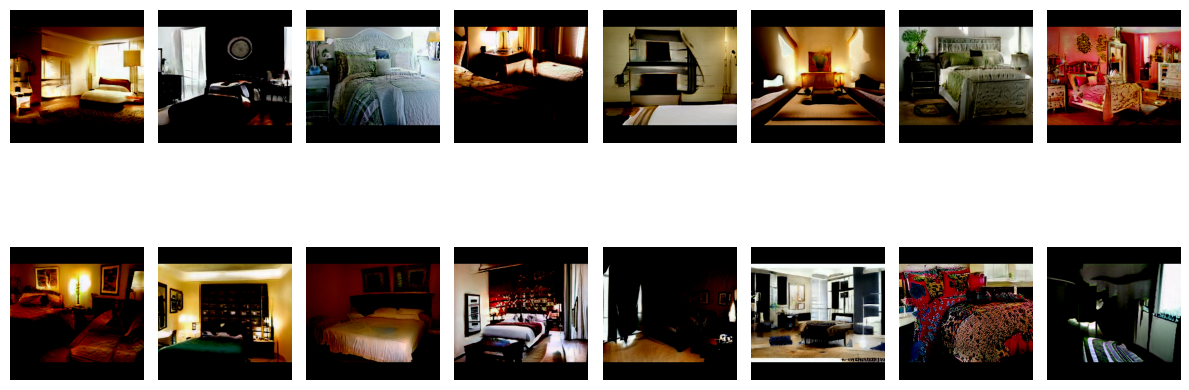




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1-b0vwevUQs6LI_EybdO8XJ5uYSx63vEa
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/ffhq-snapshot.pkl
100%|██████████| 367M/367M [00:01<00:00, 240MB/s]


Generate and save images...


100%|██████████| 16/16 [00:39<00:00,  2.45s/it]


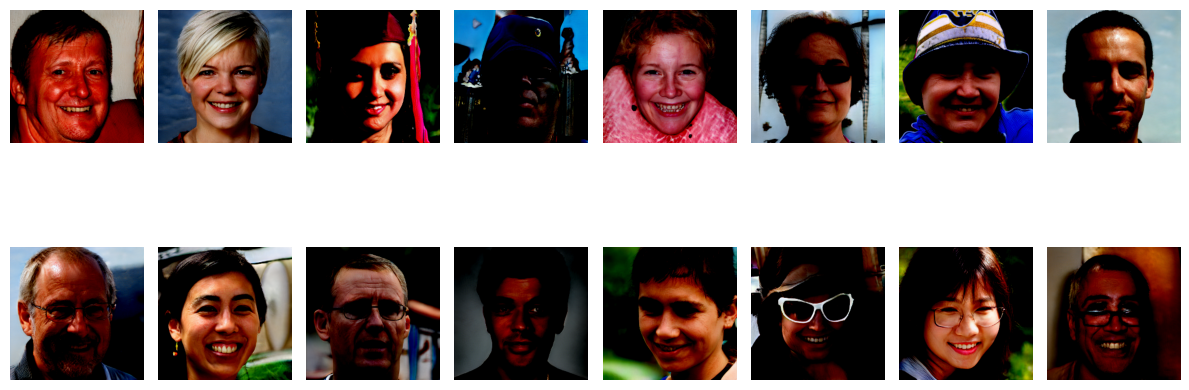




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1iL8S26IYCNAQmUS-6GYCVheKFtCE4ktQ
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/cityscapes-snapshot.pkl
100%|██████████| 367M/367M [00:01<00:00, 186MB/s]


Generate and save images...


100%|██████████| 16/16 [00:38<00:00,  2.42s/it]


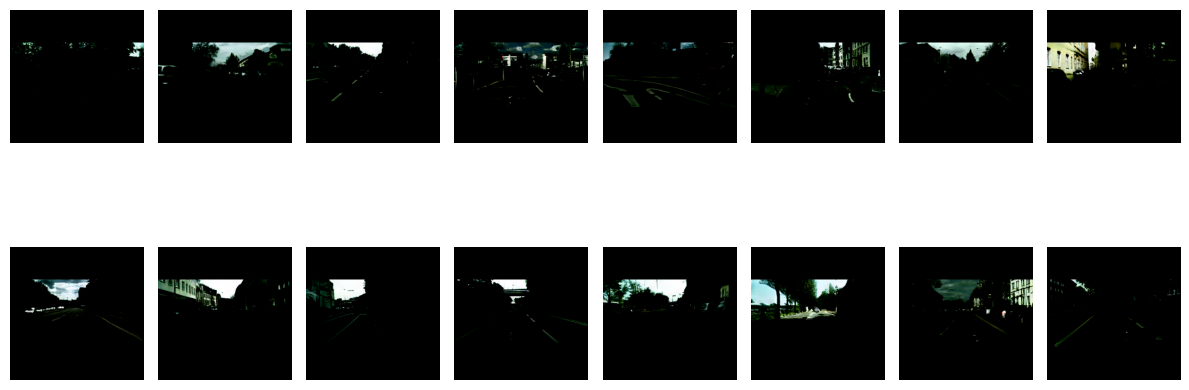




Loading networks...


Downloading...
From: https://drive.google.com/uc?id=1sYtuNEi0HGBH1F8GW2JlF4mCRGGrtZa9
To: /content/gansformer/pytorch_version/gansformer/pytorch_version/gansformer/pytorch_version/clevr-snapshot.pkl
100%|██████████| 362M/362M [00:01<00:00, 239MB/s]


Generate and save images...


100%|██████████| 16/16 [00:35<00:00,  2.21s/it]


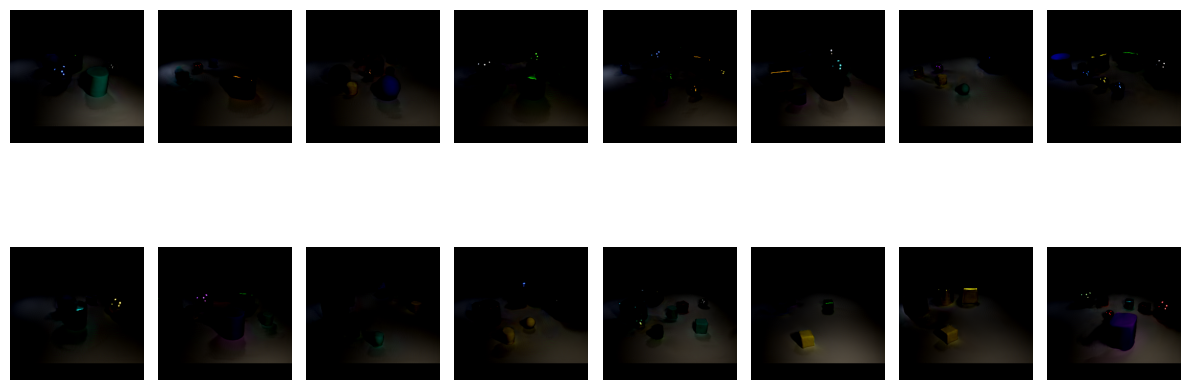

In [28]:
def run(model, gpus, output_dir, images_num, truncation_psi, ratio, additional_model_name, img_grid_cols = 8):
    device = torch.device("cpu" if gpus == "0" else "cuda")
    print("Loading networks...")
    G = loader.load_network(model, eval = True)["Gs"].to(device)

    print("Generate and save images...")
    try:
      os.makedirs(output_dir, exist_ok=True)
    except Exception as e:
      print("Error creating directories:", e)

    assert (images_num % img_grid_cols) == 0, "Image grid does not have the correct shape."
    img_grid_rows = (images_num // img_grid_cols)
    fig, axes = plt.subplots(img_grid_rows, img_grid_cols, figsize=(12, 6))

    for i in trange(images_num):
        z = torch.randn([1, *G.input_shape[1:]], device = device)
        # imgs.shape: (batch_size, nr_channels, width, height)
        imgs = G(z, truncation_psi = truncation_psi)[0].cpu().numpy()
        # imgs.shape: (width, height, nr_channels)
        imgs = imgs[0].transpose(1, 2, 0)
        add_image_to_subplot(imgs=imgs, axes=axes, index=i, cols=img_grid_cols)
        pattern = os.path.join(output_dir, f"{additional_model_name}_sample_{i:06d}.png")
        img = crop(misc.to_pil(imgs[0]), ratio).save(pattern.format(i))
    plt.tight_layout()
    plt.show()
    print("\n\n")

def add_image_to_subplot(imgs, axes, index, cols):
    ax = axes[index // cols, index % cols]
    ax.imshow(imgs)
    ax.axis('off')

def main():
    parser = argparse.ArgumentParser(description = "Generate images with the GANformer")
    parser.add_argument("--model",              help = "Filename for a snapshot to resume", type = str)
    parser.add_argument("--gpus",               help = "Comma-separated list of GPUs to be used (default: %(default)s)", default = "0", type = str)
    parser.add_argument("--output-dir",         help = "Root directory for experiments (default: %(default)s)", default = "images", metavar = "DIR")
    parser.add_argument("--images-num",         help = "Number of images to generate (default: %(default)s)", default = 32, type = int)
    parser.add_argument("--truncation-psi",     help = "Truncation Psi to be used in producing sample images (default: %(default)s)", default = 0.7, type = float)
    parser.add_argument("--ratio",              help = "Crop ratio for output images (default: %(default)s)", default = 1.0, type = float)

    models : List[str] = ["gdrive:bedrooms-snapshot.pkl", "gdrive:ffhq-snapshot.pkl", "gdrive:cityscapes-snapshot.pkl", "gdrive:clevr-snapshot.pkl"]
    truncation_psis : List[str] = [0.7, 1.0] # controls how random will the generated images look to each other
    args, _ = parser.parse_known_args()

    for truncation_psi in truncation_psis:
      for model in models:
        model_name : str = f"{search(r'gdrive:(.*?)-snapshot.pkl', model).group(1)}_{str(truncation_psi).replace('.', '_')}"
        args.model : str = model
        args.gpus : str = "0"
        args.output_dir : str = "images"
        args.images_num : int = 16
        args.truncation_psi : float = truncation_psi
        args.ratio : float = 0.95
        run(**vars(args), additional_model_name=model_name)

if __name__ == "__main__":
    main()

In [ ]:
!python generate.py --gpus 0 --model gdrive:cityscapes-snapshot.pkl --output-dir images --images-num 20

Loading networks...
Downloading...
From: https://drive.google.com/uc?id=1iL8S26IYCNAQmUS-6GYCVheKFtCE4ktQ
To: /content/gansformer/pytorch_version/cityscapes-snapshot.pkl
100% 367M/367M [00:01<00:00, 278MB/s]
Generate and save images...
  0% 0/20 [00:00<?, ?it/s]Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
100% 20/20 [00:03<00:00,  5.83it/s]


In [ ]:
!python prepare_data.py --clevr --max-images 10

2023-11-05 11:51:01.212268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 11:51:01.212328: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 11:51:01.212369: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 11:51:01.220944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 11:51:02.443860: W tensorflow/c

In [ ]:
!python run_network.py --train --gpus 0 --ganformer-default --expname clevr-pretrained --dataset clevr --pretrained-pkl gdrive:clevr-snapshot.pkl

Streaming output truncated to the last 5000 lines.
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/gansformer/pytorch_version/torch_utils/ops/conv2d_gradfix.py:47: UserWarning: conv2d_gradfix not supported on PyTorch 2.1.0+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/gansformer/pytorch_version/torch_utils/ops/conv2d_gradfix.py:47: UserWarning: conv2d_gradfix not supported on PyTorch 2.1.0+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/gansformer/pytorch_version/torch_utils/ops/conv2d_gradfix.py:47: UserWarning: conv2d_gradfix not supported on PyTorch 2.1.0+cu118. Falling back to torch.nn.functional.conv2d().
  warnings

In [ ]:
!python run_network.py --eval --gpus 0 --ganformer-default --expname clevr-pretrained --dataset clevr --pretrained-pkl gdrive:clevr-snapshot.pkl

Resuming clevr-pretrained-000, from gdrive:clevr-snapshot.pkl, kimg 0
Loading training set...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument is not used and will be removed in 2.2.0."
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Num images: 12
Image shape: [3, 256, 256]
Label shape: [0]
Resuming from gdrive:clevr-snapshot.pkl
Downloading...
From: https://drive.google

In [ ]:
!python run_network.py --gpus 0 --vis --expname bedrooms-exp --dataset bedrooms --vis-layer-maps --pretrained-pkl gdrive:bedrooms-snapshot.pkl
!python run_network.py --gpus 0 --vis --expname ffhq-exp --dataset ffhq --vis-layer-maps --pretrained-pkl gdrive:ffhq-snapshot.pkl
!python run_network.py --gpus 0 --vis --expname cityscapes-exp --dataset cityscapes --vis-layer-maps --pretrained-pkl gdrive:cityscapes-snapshot.pkl
!python run_network.py --gpus 0 --vis --expname clevr-exp --dataset clevr --vis-layer-maps --pretrained-pkl gdrive:clevr-snapshot.pkl

Resuming bedrooms-exp-000, from gdrive:bedrooms-snapshot.pkl, kimg 0
Loading training set...
Error: Dataset folder datasets/bedrooms/256 doesn't exists. Follow data preparation instructions using the prepare_data.py script.
Resuming ffhq-exp-000, from gdrive:ffhq-snapshot.pkl, kimg 0
Loading training set...
Error: Dataset folder datasets/ffhq/256 doesn't exists. Follow data preparation instructions using the prepare_data.py script.
Resuming cityscapes-exp-000, from gdrive:cityscapes-snapshot.pkl, kimg 0
Loading training set...
Error: Dataset folder datasets/cityscapes/256 doesn't exists. Follow data preparation instructions using the prepare_data.py script.
Resuming clevr-exp-000, from gdrive:clevr-snapshot.pkl, kimg 0
Loading training set...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument